In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt 
df = pd.read_csv("sales.csv",delimiter=",", encoding="ISO-8859-1")
conn = sqlite3.connect("sales_data.db")


df.to_sql("sales", conn, if_exists="replace", index=False)



print("successfull connection")



successfull


In [8]:
conn = sqlite3.connect("sales_data.db")
query = "select sum(sales) as SALES_BY_PRODUCT ,PRODUCTLINE from sales group by PRODUCTLINE"
df = pd.read_sql_query(query, conn)
df

,SALES_BY_PRODUCT,PRODUCTLINE
0,3919615.66,Classic Cars
1,1166388.34,Motorcycles
2,975003.57,Planes
3,714437.13,Ships
4,226243.47,Trains
5,1127789.84,Trucks and Buses
6,1903150.84,Vintage Cars


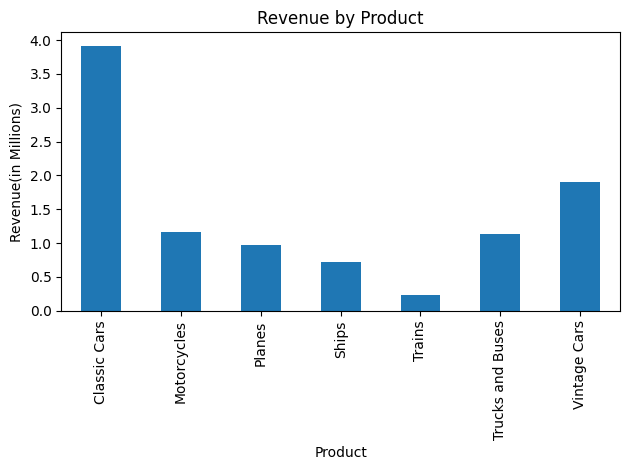

In [12]:
import matplotlib.pyplot as plt 
df['sales_in_millions'] = df['SALES_BY_PRODUCT'] / 1e6

df.plot(kind='bar', x = 'PRODUCTLINE', y = 'sales_in_millions',legend=False)

plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue(in Millions)")
plt.tight_layout()

In [13]:
conn = sqlite3.connect("sales_data.db")
query = "select count(ORDERNUMBER) as TOTAL_CUSTOMERS, sum(SALES) as TOTAL_REVENUE , count(distinct(COUNTRY))as PRODUCT_SUPPLIED_COUNTRY FROM sales"
df1 = pd.read_sql_query(query, conn)
df1


,TOTAL_CUSTOMERS,TOTAL_REVENUE,PRODUCT_SUPPLIED_COUNTRY
0,2823,"10,032,628.85",19


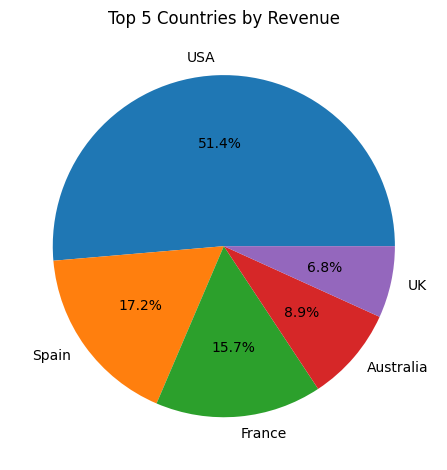

In [17]:
conn = sqlite3.connect("sales_data.db")
query = "select sum(SALES) as Revenue,COUNTRY FROM sales group by COUNTRY order by Revenue desc limit 5"
df2 = pd.read_sql_query(query,conn)
df2.set_index('COUNTRY').plot(kind='pie', y='Revenue', autopct='%1.1f%%', legend=False)
plt.title("Top 5 Countries by Revenue")
plt.ylabel("")
plt.tight_layout()
plt.show()


